# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For solving exercises
from sklearn.preprocessing import LabelEncoder


# Global variables

In [2]:
random_state = 1

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [3]:
data_folder = "data/"

src_train = f"{data_folder}application_train.csv.zip" #'https://docs.google.com/uc?export=download&id=1TNRRGlws5vWKEum8v1PQrVq8PGacMT9Y'
src_test = f"{data_folder}application_test.csv.zip" #'https://docs.google.com/uc?export=download&id=1IEUuu-Czdv2gsE8Q0EUtGvUelh2xUwN8'
src_previous = f"{data_folder}previous_application.csv.zip" #'https://docs.google.com/uc?export=download&id=15PuV3DpXii2FokryWCyxTS4HGUj4Kbmn'
src_bureau = f"{data_folder}bureau.csv.zip" #'https://docs.google.com/uc?export=download&id=18ycqN4m4zmoLvZHWIvYzF9SZiErAPeTi'

app_train = pd.read_csv(src_train, compression="zip")
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [4]:
# The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past
# 1 - Loading the different datasets
app_test = pd.read_csv(src_test, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")
app_past = pd.read_csv(src_previous, compression="zip")

In [5]:
# 2 - The number of rows and columns for each
app_test_cols, app_test_rows = app_test.shape
bureau_cols, bureau_rows = bureau.shape
app_past_cols, app_past_rows = app_past.shape

print(f"Test set: columns: {app_test_cols}, rows: {app_test_rows}\n"
      f"Bureau: columns: {bureau_cols}, rows: {bureau_rows}\n"
      f"Past applications: columns: {app_past_cols}, rows: {app_past_rows}")

Test set: columns: 48744, rows: 121
Bureau: columns: 1716428, rows: 17
Past applications: columns: 1670214, rows: 37


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [6]:
# 3 - missing values
def get_columns_with_max_nans(df: pd.DataFrame) -> tuple[list[str], int]:
    """
    Finds the columns with the most missing (NaN) values in a given DataFrame.
    
    The function calculates the sum of NaN values for each column and identifies 
    all columns that have the maximum number of missing values.

    Parameters:
      - df (pd.DataFrame): The input DataFrame to analyze for NaN values.
    
    Returns:
      - max_nan_columns, max_nan_value (tuple[list[str], int]): A tuple containing a list of column names with the most NaNs (list of str) 
        and the corresponding count of NaN values (int).
    """
    nan_counts = df.isnull().sum()
    max_nan_value = nan_counts.iloc[-1]  # get the maximum number of NaNs (last element)
    max_nan_columns = nan_counts[nan_counts == max_nan_value].index.tolist()  # get all columns with that value
    return max_nan_columns, max_nan_value

In [7]:
app_test_col, app_test_val = get_columns_with_max_nans(app_test) # 3a
bureau_col, bureau_val = get_columns_with_max_nans(bureau) # 3b
app_past_col, app_past_val = get_columns_with_max_nans(app_past) # 3c

print(f"Test set: \n    columns: {app_test_col}\n    value: {app_test_val}\n"
      f"Bureau: \n    columns: {bureau_col}\n    value: {bureau_val}\n"
      f"Past applications: \n    columns: {app_past_col}\n    value: {app_past_val}")

Test set: 
    columns: ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
    value: 6049
Bureau: 
    columns: ['AMT_ANNUITY']
    value: 1226791
Past applications: 
    columns: ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
    value: 673065


In [8]:
# 4 - Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).
def transformChildren(df: pd.DataFrame):
  bins = [-1, 0, 2, 4, 10]  # ranges: -1-0, 1-2, 3-4, 5+
  labels = ['0 children', '1-2 children', '3-4 children', '5+ children']
  # apply binning
  df['CNT_CHILDREN'] = pd.cut(df['CNT_CHILDREN'], bins=bins, labels=labels)
  return df

def handle_nans(df: pd.DataFrame, row_thres: float=0.05, col_thres: float=0.25, num_unique=4) -> pd.DataFrame:
  """
  Handles missing data in the following ways:
  1. Drops the column if more than a given percentage (col_thres) of data is missing.
  2. Drops rows with missing values if the percentage of missing values in a column is below a threshold (row_thres).
  3. For the categorical variables: we consider variable as categorical if:
    - its dtype is 'object'
    - its dtype is 'int64' and number of unique values is <= 4
  4. For the rest, fills NaNs in (numerical) columns with the mean of the column.
  5. Transform CNT_CHILDREN into categorical variable (4 classes).

  Parameters:
    - df (pd.DataFrame): The input DataFrame with missing data.
    - row_threshold (float): The threshold percentage (default 5%) to drop rows with missing values.
    - col_threshold (float): The threshold percentage (default 50%) to drop columns with too many missing values.
    - num_unique (int): Threshold for the number of unique elements in 'int64' columns to categorize them as categorical columns.

  Returns:
    - df (pd.DataFrame): The DataFrame after handling missing data.
  """
  missing_percentage = df.isnull().mean() # calculate the percentage of missing values for each column
  # step 1: drop columns where the missing percentage is greater than the column threshold
  df = df.loc[:, missing_percentage <= col_thres]
  # step 2: drop rows for columns where missing percentage is less than the row threshold
  columns_to_drop_rows = missing_percentage[missing_percentage < row_thres].index
  df = df.dropna(subset=columns_to_drop_rows)
  # step 3 (after review: not necessary): treat columns with object type or less than num_unique values as categorical
  cat_object_columns = df.select_dtypes(include=['object']).columns
  cat_int_df = df.select_dtypes(include=['int64'])
  cat_int_columns = cat_int_df.nunique()[cat_int_df.nunique() <= num_unique].index.values
  # combine both object and int64 variables to treat as categorical
  categorical_columns = cat_object_columns.union(cat_int_columns)
  # fill NaNs in categorical columns with 'missing'
  df[categorical_columns] = df[categorical_columns].fillna('missing')
  print(f"Number of categorical columns: {len(categorical_columns)}")
  # step 4: fill NaNs in numerical columns with the mean
  numerical_columns = df.select_dtypes(include=[np.number]).columns
  df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
  # step 5: transform CNT_CHILDREN into categorical variable
  df = transformChildren(df)
  return df

In [9]:
app_test = handle_nans(app_test) # 4
print(f"New shape: {app_test.shape}")
print(f"Number of NaNs: {app_test.isnull().sum().sum()}")

Number of categorical columns: 45
New shape: (47772, 71)
Number of NaNs: 0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)

**Answer**: There are different ways to handle missing data. The logic I decided to implement is:
1. If the number of missing values in a column is too much relative to the total number of rows (`25%`), we drop the column
2. If the number of missing values in a column is low relative to the total number of rows (`5%`), we drow the rows containing these missing values
for the rest cases, it is not as straightforward:
3. For the categorical variables: we consider variable as categorical if:
   - Its `dtype` is `object`
   - Its `dtype` is `int64` and number of unique values is $<= 4$.
   - This results in $45$ columns.
   - **IMPORTANT**: After review, this step is not actually necessary: there are no NaNs in these 45 selected columns.
4. Else, we take the mean of the column and fill NaNs with it.
5. Transform `CNT_CHILDREN` into categorical variable (4 classes).



## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

Target variable distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Ratio: 11.39


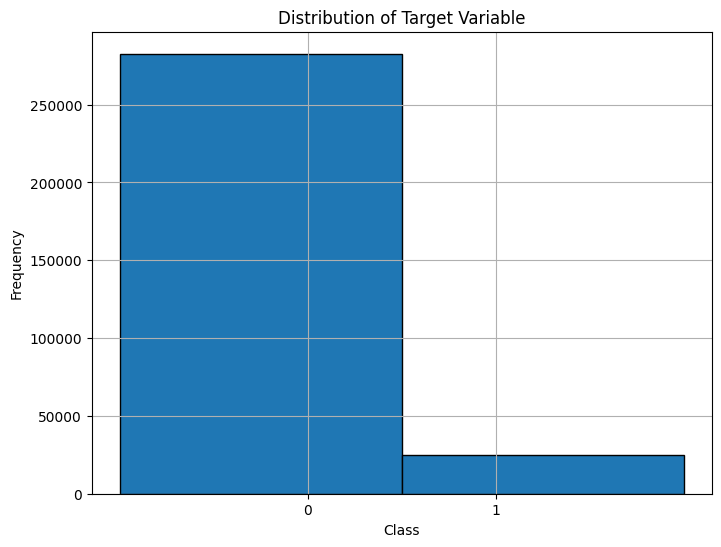

In [10]:
# 5 - Class imbalance: analysis
target_col = "TARGET"
target_data = app_train[target_col]
# 5 - value counts
print(f"Target variable distribution:\n"
      f"{target_data.value_counts()}\n"
      f"Ratio: {round(target_data.value_counts()[0]/target_data.value_counts()[1], 2)}")
# 5 - histograms
plt.figure(figsize=(8, 6))
plt.hist(target_data, bins=2, edgecolor='black', range=(-1, 2))
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

**5**: Describe briefly your observation (double click to edit a text cell).

**Answer**: from the histogram and `value_counts` its clear that the distribution of target variable is imbalanced; class `0` is more present than class `1` with ratio `11.39`.

In [11]:
# 6 - Class imbalance: undersampling/oversampling
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/
app_train_new = app_train.copy()

# 6.a - Fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

Manual undersampling, target variable distribution:
TARGET
1    24825
0    24825
Name: count, dtype: int64


**Solution**: For undersampling we can easily take the random subset of the dominant class with the same cardinality as the minority class, leading to the same number of instances in each class. With this solution we lose a lot of valuable information. The better solution would be to oversample the minority class. To do this, we would need to utilize the K-Means algorithm to properly synthesize data (which SMOTE essentially does).

In [ ]:
class_0 = app_train_new[app_train_new["TARGET"] == 0]
class_1 = app_train_new[app_train_new["TARGET"] == 1]
# undersample the majority class
class_0_undersampled = class_0.sample(n=len(class_1), random_state=random_state)
# combine the undersampled class_0 and class_1
app_train_new = pd.concat([class_0_undersampled, class_1])
# shuffle the dataset
app_train_new = app_train_new.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(f"Manual undersampling, target variable distribution:\n{app_train_new['TARGET'].value_counts()}")


# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.


## Your code here
app_train_smote = ...


# We will use the dataframe app_train from 6.a in the following

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?\
**Answer**: `NAME_HOUSING_TYPE` is a categorical variable that has 6 different classes. We can convert these classes into integers, i.e. $0,1,2,3,4,5$, or one-hot encode them, i.e. $[1,0,0,0,0,0], [0,1,0,0,0,0]$, etc. However, using integer encoding can sometimes cause the model to assume a ranking or ordinal relationship between the categories, which is not true in our case. So, we will use one-hot encoding. For `CODE_GENDER` we can use binary encoding, since it is a binary variable, and thus not increase feature space unnecessarily.

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.\
**Answer**: to use only $3$ categories for `NAME_HOUSING_TYPE`, we would need to group some categories together. Logically, these categories would be:
1. `House / apartment`, `Co-op apartment` - stable housing, usually older people with stable income.
2. `With parents` - with parents, mostly young people.
3. `Municipal apartment`, `Rented apartment`, `Office apartment` - temporal housing.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?\
**Answer**: from the code we get that the size of the dummy vector for ORGANIZATION_TYPE after the transformation is $4$, i.e. we transform $58$ categories into $4$ categories.

8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.\
**Answer**: see code.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [12]:
print(f"{app_test['NAME_HOUSING_TYPE'].value_counts()}\n")
print(f"{app_test['CODE_GENDER'].value_counts()}\n")
print(f"{app_test['FLAG_OWN_CAR'].value_counts()}\n")
print(f"{app_test['ORGANIZATION_TYPE'].value_counts()}\n")
print(f"{app_test['ORGANIZATION_TYPE'].value_counts().shape[0]} classes for ORGANIZATION_TYPE")

NAME_HOUSING_TYPE
House / apartment      42753
With parents            2193
Municipal apartment     1602
Rented apartment         705
Office apartment         397
Co-op apartment          122
Name: count, dtype: int64

CODE_GENDER
F    32021
M    15751
Name: count, dtype: int64

FLAG_OWN_CAR
N    31675
Y    16097
Name: count, dtype: int64

ORGANIZATION_TYPE
Business Entity Type 3    10620
XNA                        9047
Self-employed              5810
Other                      2654
Medicine                   1689
Government                 1476
Business Entity Type 2     1452
Trade: type 7              1275
School                     1263
Kindergarten               1024
Construction               1021
Transport: type 4           873
Business Entity Type 1      873
Trade: type 3               570
Military                    519
Industry: type 9            491
Industry: type 3            477
Security                    464
Transport: type 2           438
Police                      429


In [20]:
label_encoder = LabelEncoder()
def encodeBinary(df: pd.DataFrame, columns: list, label_encoder: LabelEncoder) -> pd.DataFrame:
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def encodeCategorical(df: pd.DataFrame, columns: list, prefix: str ='OneHot') -> pd.DataFrame:
    df = pd.get_dummies(df, columns=columns, prefix=prefix)
    return df
    

In [21]:
app_test_new = app_test.copy()
# 7a & 7b & 7c
# encoding binary variables CODE_GENDER and FLAG_OWN_CAR
app_test_new = encodeBinary(df=app_test_new, columns=['CODE_GENDER', 'FLAG_OWN_CAR'], label_encoder=label_encoder)
# encoding NAME_HOUSING_TYPE
housing_mapping = {
    'House / apartment': 'Stable Housing',
    'Co-op apartment': 'Stable Housing',
    'Rented apartment': 'Rented/Temporary Housing',
    'Municipal apartment': 'Rented/Temporary Housing',
    'Office apartment': 'Rented/Temporary Housing',
    'With parents': 'With parents'
} # define mapping for NAME_HOUSING_TYPE to convert from 6 classes to 3
app_test_new['NAME_HOUSING_TYPE'] = app_test_new['NAME_HOUSING_TYPE'].map(housing_mapping) # apply the mapping to create a new column with 3 categories
# encoding ORGANIZATION_TYPE
threshold = app_test_new.shape[0] * 0.1 # define cut-off threshold
org_type_counts = app_test_new['ORGANIZATION_TYPE'].value_counts() # count each category 
org_below_threshold = org_type_counts[org_type_counts < threshold].index # get categories whose count < threshold 
app_test_new['ORGANIZATION_TYPE'] = app_test_new['ORGANIZATION_TYPE'].replace(org_below_threshold, 'Other') # replace categoies to 'other' whose count < threshold
# one-hot encode NAME_HOUSING_TYPE and new ORGANIZATION_TYPE
app_test_new = encodeCategorical(app_test_new, columns=['NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'])

print(f"Original shape: {app_test.shape}; new shape: {app_test_new.shape}")

Original shape: (47772, 71); new shape: (47772, 76)


In [24]:
app_test_new.nunique()[app_test_new.nunique() > 2].sort_values()

REGION_RATING_CLIENT               3
AMT_REQ_CREDIT_BUREAU_WEEK         4
AMT_REQ_CREDIT_BUREAU_DAY          4
AMT_REQ_CREDIT_BUREAU_HOUR         4
REGION_RATING_CLIENT_W_CITY        4
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
NAME_INCOME_TYPE                   6
NAME_TYPE_SUITE                    7
DEF_60_CNT_SOCIAL_CIRCLE           7
WEEKDAY_APPR_PROCESS_START         7
AMT_REQ_CREDIT_BUREAU_MON          8
DEF_30_CNT_SOCIAL_CIRCLE           8
AMT_REQ_CREDIT_BUREAU_QRT          9
CNT_CHILDREN                      11
CNT_FAM_MEMBERS                   12
AMT_REQ_CREDIT_BUREAU_YEAR        17
HOUR_APPR_PROCESS_START           24
OBS_60_CNT_SOCIAL_CIRCLE          27
OBS_30_CNT_SOCIAL_CIRCLE          28
REGION_POPULATION_RELATIVE        81
AMT_INCOME_TOTAL                 599
AMT_GOODS_PRICE                  671
EXT_SOURCE_3                     701
AMT_CREDIT                      2912
DAYS_LAST_PHONE_CHANGE          3571
DAYS_ID_PUBLISH                 5874
A

In [16]:
# 8 
def handleCategorical(df: pd.DataFrame, n_unique: int = 4) -> pd.DataFrame:
    # 1. transform CNT_CHILDREN into categorical variable
    df = transformChildren(d=df)
    
    # 2. get categorical columns
    binary_variables = app_test_new.nunique()[app_test_new.nunique() == 2].index.values
    cat_obj_variables = app_test_new.select_dtypes(include=['object'])
    cat_int_variables = app_test_new.nunique()[app_test_new.nunique() > 2][app_test_new.nunique() <= n_unique].index.values
    categorical_columns = cat_obj_variables.union(cat_int_variables)
    print(f"Binary columns: {binary_variables}\n")
    print(f"Categorical object variables: {cat_obj_variables}\n")
    print(f"Categorical int64 variables: {cat_int_variables}\n")
    print(f"Categorical union variables: {categorical_columns}\n")

    # 3. encode data
    df = encodeBinary(df=df, columns=binary_variables, label_encoder=LabelEncoder)
    df = encodeCategorical(df=df, columns=categorical_columns)

    return df

In [30]:
app_test_new

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Housing_Rented/Temporary Housing,Housing_Stable Housing,Housing_With parents,Organization_Business Entity Type 3,Organization_Other,Organization_Self-employed,Organization_XNA
0,100001,Cash loans,0,0,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,False,True,False,False,True,False,False
1,100005,Cash loans,1,0,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,3.0,False,True,False,False,False,True,False
2,100013,Cash loans,1,1,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,1.0,4.0,False,True,False,False,True,False,False
3,100028,Cash loans,0,0,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,3.0,False,True,False,True,False,False,False
4,100038,Cash loans,1,1,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,0,0,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,0.0,1.0,False,True,False,False,True,False,False
48740,456222,Cash loans,0,0,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,False,True,False,False,True,False,False
48741,456223,Cash loans,0,1,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,3.0,1.0,False,True,False,True,False,False,False
48742,456224,Cash loans,1,0,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,0.0,2.0,False,True,False,False,False,True,False


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [ ]:
## Your code here

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
## Your code here

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

